In [1]:
import cartopy.crs as ccrs
from cmocean import cm 
from dino import Experiment
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np
import xarray as xr
import cftime as cft
import xnemogcm as xn
import xgcm

In [49]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
path   = "/data/dkamm/nemo_output/DINO/"

dino_exp = Experiment(path, 'T_star_IPSL')

# `I)` Domain

## `I.1)` Global Bathymetry

In [3]:
bathymetry = dino_exp.data.gdept_0.isel(z_c=-1)
bathymetry = bathymetry.assign_coords({'x_globe': bathymetry.glamt - 60})

In [4]:
# Dataarray to plot the a sounthern ocean channel
channel = xr.DataArray(
    data = np.tile((bathymetry.isel(x_c=0) >= 2008) * 4308.73114341, (302,1)),
    dims=['x_c','y_c'],
    coords=dict(
        gphit=('y_c', bathymetry.gphit.values[:,0]),
        x_globe=('x_c', np.arange(-361.5,-59.5))
    )
)

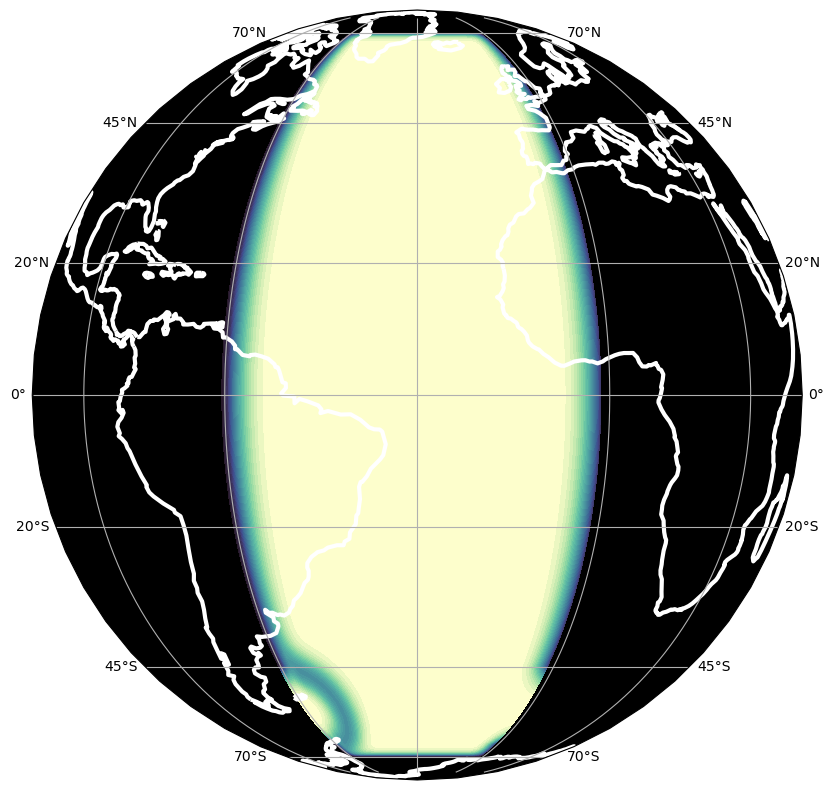

In [5]:
plt.figure(figsize=(10,10))
p = bathymetry.plot.contourf(
    y='gphit',
    x='x_globe',
    cmap=cm.deep_r,
    levels=30,
    subplot_kws=dict(projection=ccrs.Orthographic(-30., 0.), facecolor="black"),

    transform=ccrs.PlateCarree(),

    add_colorbar=False,
    # cmap='inferno'
)
# p = channel.plot.contourf(
#     y='gphit',
#     x='x_globe',
#     cmap=cm.deep_r,
#     levels=70,
#     #alpha=0.8,
#     subplot_kws=dict(projection=ccrs.Orthographic(-30., 0.), facecolor="black"),

#     transform=ccrs.PlateCarree(),

#     add_colorbar=False,
#     # cmap='inferno'
# )
plt.hlines(20, 0, 60, color='white')
p.axes.set_global()
p.axes.coastlines(color='white', linewidth=3)
p.axes.gridlines(
    draw_labels=["x", "y", "left", "right", "geo"],
    ylocs=[-70, -45, -20, 0, 20, 45, 70],
    xlocs=[-90, -60, -30, 0, 30]
)
plt.title('')
plt.grid('m')
#plt.savefig('DINO_bathy.png', facecolor=(1,1,1,0))

## `I.2)` Terrain-following $ \sigma $-coordinates

In [6]:
dino_exp.add_sigma_levels()

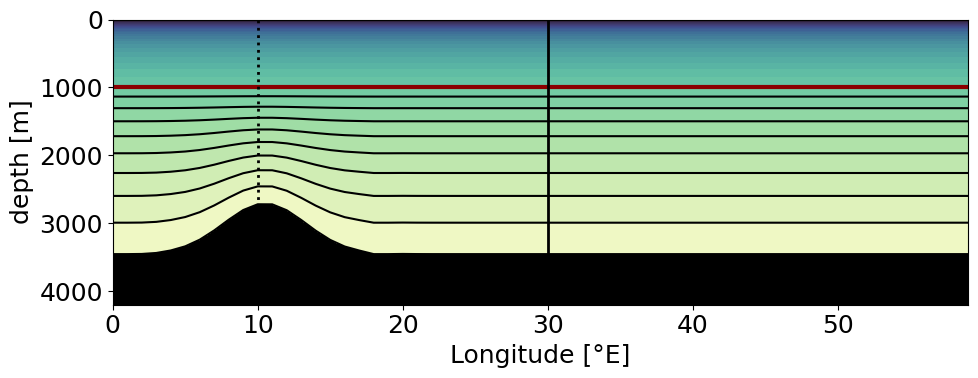

In [54]:

fig, axs = plt.subplots(1,1, figsize=(10,4))
z_cha   = dino_exp.domain.sigma_levels.isel(z_f=slice(0,27), y_c=32).plot.contourf(x='x_c', y='gdepw_0',levels=36, cmap=cm.deep_r, yincrease=False, ax=axs, vmin=1, vmax=36, add_colorbar=False)
s_cha   = dino_exp.domain.sigma_levels.isel(z_f=slice(26,-1), y_c=32).plot.contourf(x='x_c', y='gdepw_0',levels=36, cmap=cm.deep_r, yincrease=False, ax=axs, vmin=1, vmax=36, add_colorbar=False)
#cbar_z  = fig.colorbar(z_eq, ax=axs[1:2], location='bottom', label='vertical levels')
#cbar_z.ax.invert_yaxis()
dino_exp.domain.gdepw_0.isel(z_f=slice(26,-1), y_c=32).plot.line(x='x_c', add_legend=False, color='black', linestyle='-',ax=axs)
axs.hlines(1000, xmin=0, xmax=59, color='darkred', linewidth=3)
axs.vlines(10, ymin=0, ymax=4000, color='black', linestyle=':', linewidth=2)
axs.vlines(30, ymin=0, ymax=4000, color='black', linewidth=2)
axs.set_title(r'')
axs.set_facecolor('black')
axs.set_xlabel('Longitude [°E]')
plt.tight_layout()
plt.savefig('s-coords_ch.png', facecolor=(1,1,1,0))

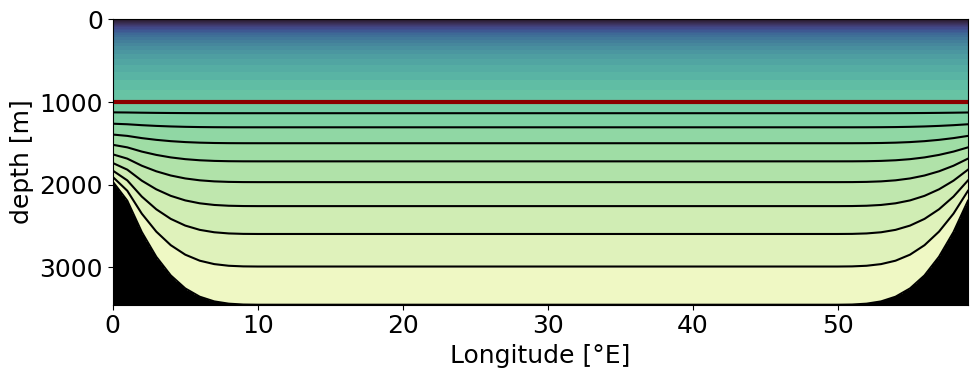

In [51]:
fig, axs = plt.subplots(1,1, figsize=(10,4))
z_eq    = dino_exp.domain.sigma_levels.isel(z_f=slice(0,27), y_c=100).plot.contourf(x='x_c', y='gdepw_0',levels=36, cmap=cm.deep_r, yincrease=False, ax=axs, vmin=1, vmax=36, add_colorbar=False)
s_eq    = dino_exp.domain.sigma_levels.isel(z_f=slice(26,-1), y_c=100).plot.contourf(x='x_c', y='gdepw_0',levels=36, cmap=cm.deep_r, yincrease=False, ax=axs, vmin=1, vmax=36, add_colorbar=False)
dino_exp.domain.gdepw_0.isel(z_f=slice(26,-1), y_c=100).plot.line(x='x_c',add_legend=False, color='black', linestyle='-',ax=axs)
axs.hlines(1000, xmin=0, xmax=59, color='darkred', linewidth=3)
axs.set_title(r'')
axs.set_facecolor('black')
axs.set_xlabel('Longitude [°E]')
plt.tight_layout()
#plt.savefig('s-coords_eq.png', facecolor=(1,1,1,0))

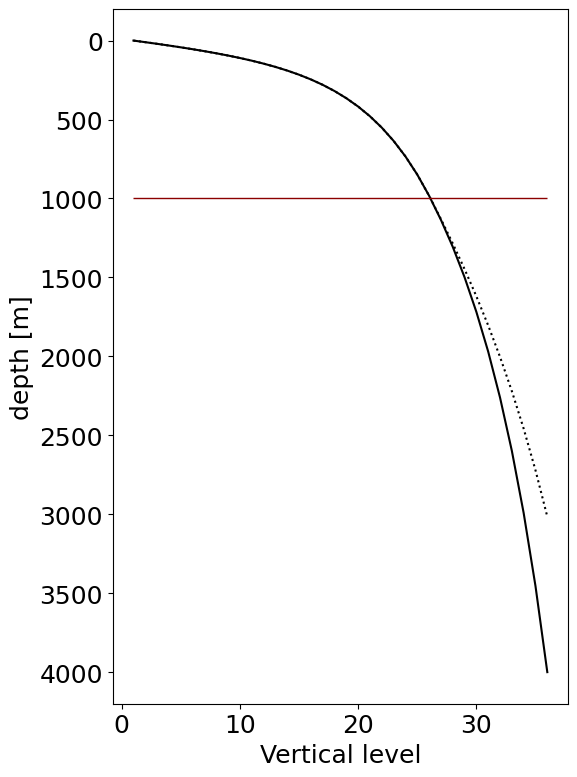

In [50]:
fig, axs = plt.subplots(1,1, figsize=(6,8))
dino_exp.domain.sigma_levels.isel(y_c=33, x_c=30).plot.line(y='gdepw_0', yincrease=False, color='black')
dino_exp.domain.sigma_levels.isel(y_c=33, x_c=10).plot.line(y='gdepw_0', yincrease=False, color='black', linestyle=':')
axs.hlines(1000, xmin=1, xmax=36, color='darkred', linewidth=1)
axs.set_xlabel('Vertical level')
plt.title('')
plt.tight_layout()
plt.savefig('s-coords.png', transparent=True)

# `II)` Forcing

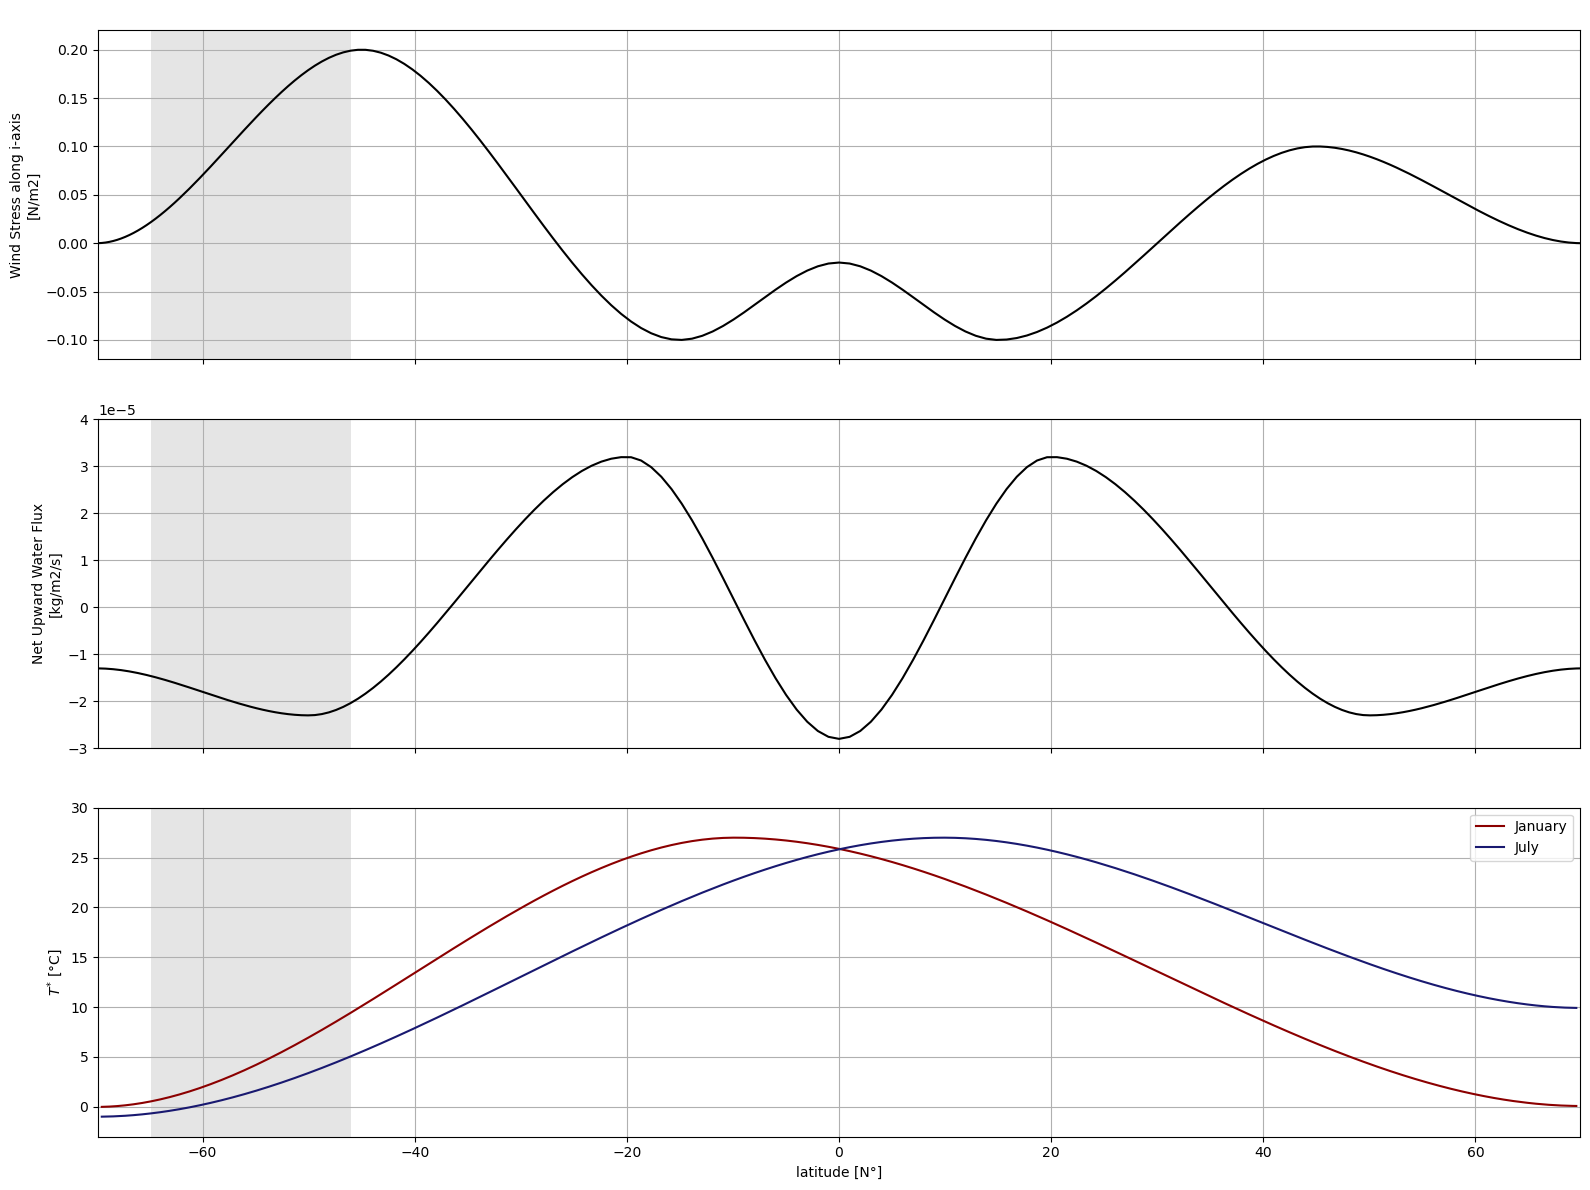

In [44]:
fig, axs = plt.subplots(3,1, figsize=(16,12), sharex=True)
dino_exp.data.utau.isel(t_y=-1, x_f=10).plot(color='black', x='gphiu', ax=axs[0])
dino_exp.data.empmr.isel(t_m=-1, x_c=10).plot(color='black', x='gphit', ax=axs[1])
dino_exp.get_T_star().isel(t_m=0, x_c=10, y_c=slice(1,-1)).plot(color='darkred', x='gphit', ax=axs[2], label='January')
dino_exp.get_T_star().isel(t_m=6, x_c=10, y_c=slice(1,-1)).plot(color='midnightblue', x='gphit', ax=axs[2], label='July')
axs[2].set_xlabel('latitude [N°]')
axs[1].set_xlabel(' ')
axs[0].set_xlabel(' ')
axs[0].fill_between(dino_exp.domain.gphiu.values[:,0], -0.12, 0.22, where=dino_exp.domain.umask.isel(x_f=0, z_c=0)==1, facecolor='grey', alpha=.2)
axs[0].margins(x=0, y=0)
axs[0].set_title(' ')
axs[0].grid()
axs[1].fill_between(dino_exp.domain.gphit.values[:,0], -3e-5, 4e-5, where=dino_exp.domain.tmask.isel(x_c=0, z_c=0)==1, facecolor='grey', alpha=.2)
axs[1].margins(x=0, y=0)
axs[1].set_title(' ')
axs[1].grid()
axs[2].fill_between(dino_exp.domain.gphit.values[:,0], -3, 30, where=dino_exp.domain.tmask.isel(x_c=0, z_c=0)==1, facecolor='grey', alpha=.2)
axs[2].margins(x=0, y=0)
axs[2].set_title(' ')
axs[2].grid()
axs[2].legend()
axs[2].set_ylabel(r'$T^{*}$ [°C]')
plt.tight_layout()
#plt.savefig('Forcing.png', facecolor=(1,1,1,0))

# `III)` Spinup

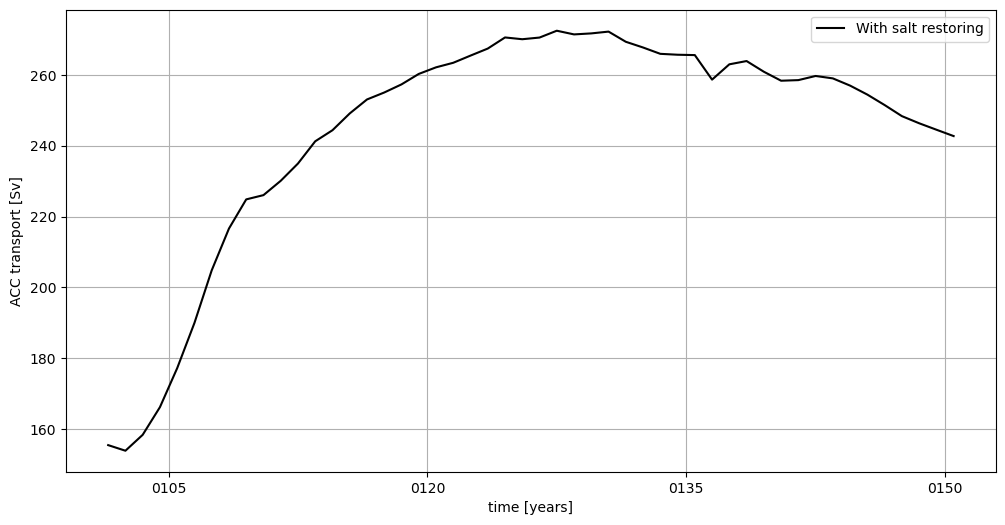

In [12]:
fig, axs = plt.subplots(1,1, figsize=(12,6))
dino_exp.get_ACC().plot(color='black', label='With salt restoring')
axs.set_ylabel('ACC transport [Sv]')
plt.title('')
plt.xlabel('time [years]')
plt.legend()
plt.grid()

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(12,6))
dino_exp.get_ACC().plot(color='black', label='With salt restoring')
axs.set_ylabel('ACC transport [Sv]')
plt.title('')
plt.xlabel('time [years]')
plt.legend()
plt.grid()

# `IV)` Ocean State

## `IV.1)` BaroTropic Streamfunction

In [10]:
BTS = dino_exp.get_BTS()

Text(0.5, 1.0, '')

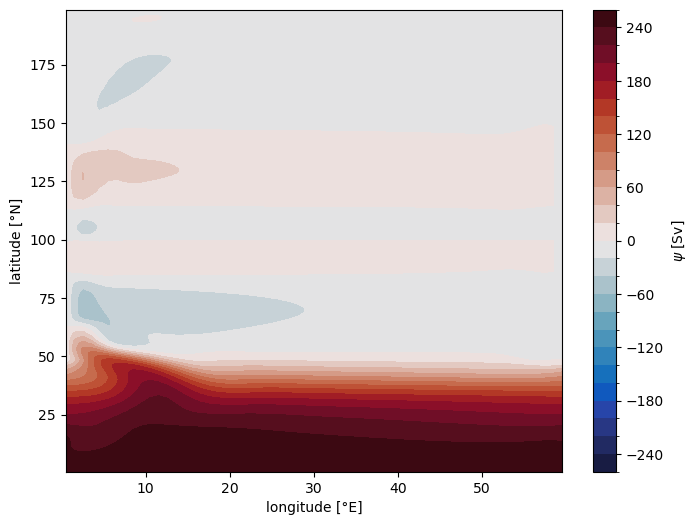

In [11]:
fig, axs = plt.subplots(1,1,figsize=(8,6))
a = BTS.isel(t_y=-1).plot.contourf(x='x_f', y='y_f', cmap=cm.balance, levels=30, add_colorbar=False)
cbar1 = fig.colorbar(a, ax=axs, label=r'$\psi$ [Sv]')
axs.set_ylabel('latitude [°N]')
axs.set_xlabel('longitude [°E]')
plt.title('')

## `IV.2)` Meridional overturning

In [3]:
moc =  dino_exp.get_MOC(dino_exp.data.vocetr_eff)

/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/xgcm/grid.py:989: FutureWarning: From version 0.8.0 the Axis computation methods will be removed, in favour of using the Grid computation methods instead. i.e. use `Grid.transform` instead of `Axis.transform`
  warnings.warn(
/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/xgcm/transform.py:247: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  out = xr.apply_ufunc(


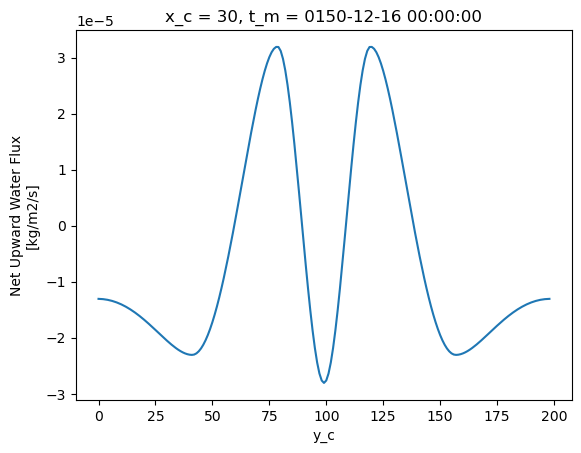

In [8]:
dino_exp.data.empmr.isel(t_m=-1, x_c=30).plot()

In [16]:
var = dino_exp.data.vocetr_eff
ds_top = dino_exp.data.isel(z_c=slice(0,-1))
# Compute density if necessary
if 'rhop' not in list(dino_exp.data.keys()):
    rho = dino_exp.get_rho().isel(z_c=slice(0,-1)).rename('rhop')
else:
    rho = ds_top.rhop
rho = rho.where(dino_exp.domain.tmask == 1.0)
# define XGCM grid object with outer dimension z_f 
grid = xgcm.Grid(ds_top,
    coords={
        "X": {"right": "x_f", "center":"x_c"},
        "Y": {"right": "y_f", "center":"y_c"},
        "Z": {"center": "z_c", "outer": "z_f"}
    },
    metrics=xn.get_metrics(ds_top),
    periodic=False
)
# Interpolate sigma2 on the cell faces
rho_var = grid.interp_like(rho, var.isel(z_c=slice(0,-1)))
rho_out = grid.interp(rho_var, 'Z',  boundary='extend')
# Target values for density coordinate
rho_tar = np.linspace(
    1020,#floor(rho_out.min().values),
    1032,#ceil(rho_out.max().values),
    36
)
# Transform variable to density coordinates:
var_transformed = grid.transform(var.isel(z_c=slice(0,-1)),
    'Z',
    rho_tar,
    method='conservative',
    target_data=rho_out
)

/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/xgcm/grid.py:989: FutureWarning: From version 0.8.0 the Axis computation methods will be removed, in favour of using the Grid computation methods instead. i.e. use `Grid.transform` instead of `Axis.transform`
  warnings.warn(
/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/xgcm/transform.py:247: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  out = xr.apply_ufunc(


Text(0.5, 1.0, '')

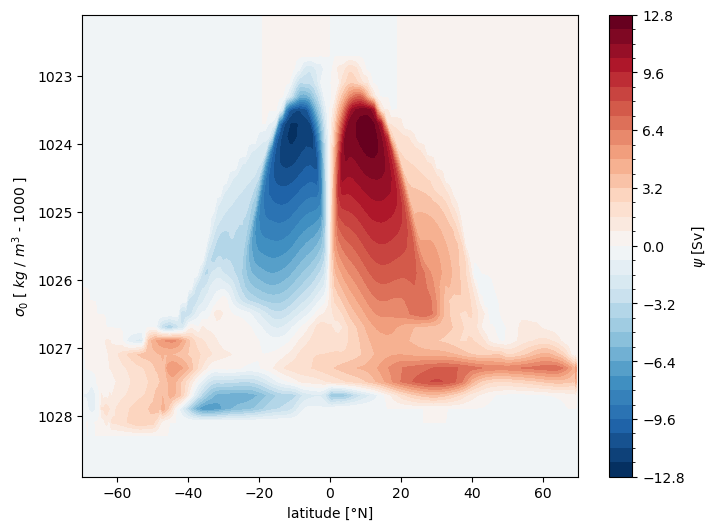

In [5]:
fig, axs = plt.subplots(1,1,figsize=(8,6))
a = (-moc).plot.contourf(x='y_f', y='rhop', cmap='RdBu_r', levels=36, add_colorbar=False)
cbar1 = fig.colorbar(a, ax=axs, label=r'$\psi$ [Sv]')
plt.xlabel('latitude [°N]')
axs.invert_yaxis()
plt.ylabel(r'$\sigma_{0}$ [ $kg$ / $m^3$ - 1000 ]')
plt.title('')

# Regridding restart files

In [ ]:
import cartopy.crs as ccrs
from cmocean import cm 
from dino import Experiment
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np
import xarray as xr
import cftime as cft
import xnemogcm as xn
import xgcm

In [ ]:
path   = "/data/dkamm/nemo_output/DINO/"

dino_exp = Experiment(path, 'IPSL_Forcing')

In [ ]:
dino_exp_hr = Experiment(path, 'DINO_1_4deg_restart')

In [ ]:
dino_exp.namelist = dino_exp.open_namelist(restart=6)
dino_exp.path += 'restart6/'

In [ ]:
restart1 = dino_exp.regrid_restart(dino_exp_hr)

In [ ]:
#restart1.to_netcdf(dino_exp.path + 'DINO_350y_1_4_restart.nc', unlimited_dims='time_counter')

In [ ]:
dino_exp.path = path + 'IPSL_Forcing/'
dino_exp.namelist = dino_exp.open_namelist(restart=9)
dino_exp.path += 'restart9/'

In [ ]:
restart2 = dino_exp.regrid_restart(dino_exp_hr)

In [ ]:
restart2.kt

In [ ]:
#restart2.to_netcdf(dino_exp.path + 'DINO_500y_1_4_restart.nc', unlimited_dims='time_counter')

In [ ]:
restart1.kt

In [ ]:
hr = xr.open_dataset(path + '../NEVERWORLD/high_res_short1/NEVERWORLD_00000032_restart.nc').rename_vars({'x':'lon', 'nav_lat_grid_t':'lat'}).rename_dims({'nav_lon_grid_t':'x'})
lr = xr.open_dataset(path + '../NEVERWORLD/1_deg_GM/NEVERWORLD_05760000_restart.nc')

In [ ]:
hr

In [ ]:
lr

In [ ]:
dino_exp.domain